# Learning Curves

# Here is how you can plot the learning curve in practice:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

def plot_learning_curve(model, X, y):
    cv = 3 # number of cross validation runs
    
    train_sizes, train_scores, test_scores = learning_curve(
        model,
        X,
        y,
        cv=cv,
        n_jobs=-1
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    print("training scores:",train_scores_mean)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.title("Learning curve")
    y_min = np.min(test_scores_mean - test_scores_std)
    plt.ylim((y_min,1))
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(train_sizes, train_scores_mean, "o-", 
             color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, "o-", 
             color="g", label="Test score (cv=%i)"%cv)
    plt.legend(loc="best")

ImportError: Error importing numpy: you should not try to import numpy from
        its source directory; please exit the numpy source tree, and relaunch
        your python interpreter from there.

training scores: [0.9859944  0.9554413  0.90780142 0.89439655 0.87228715]


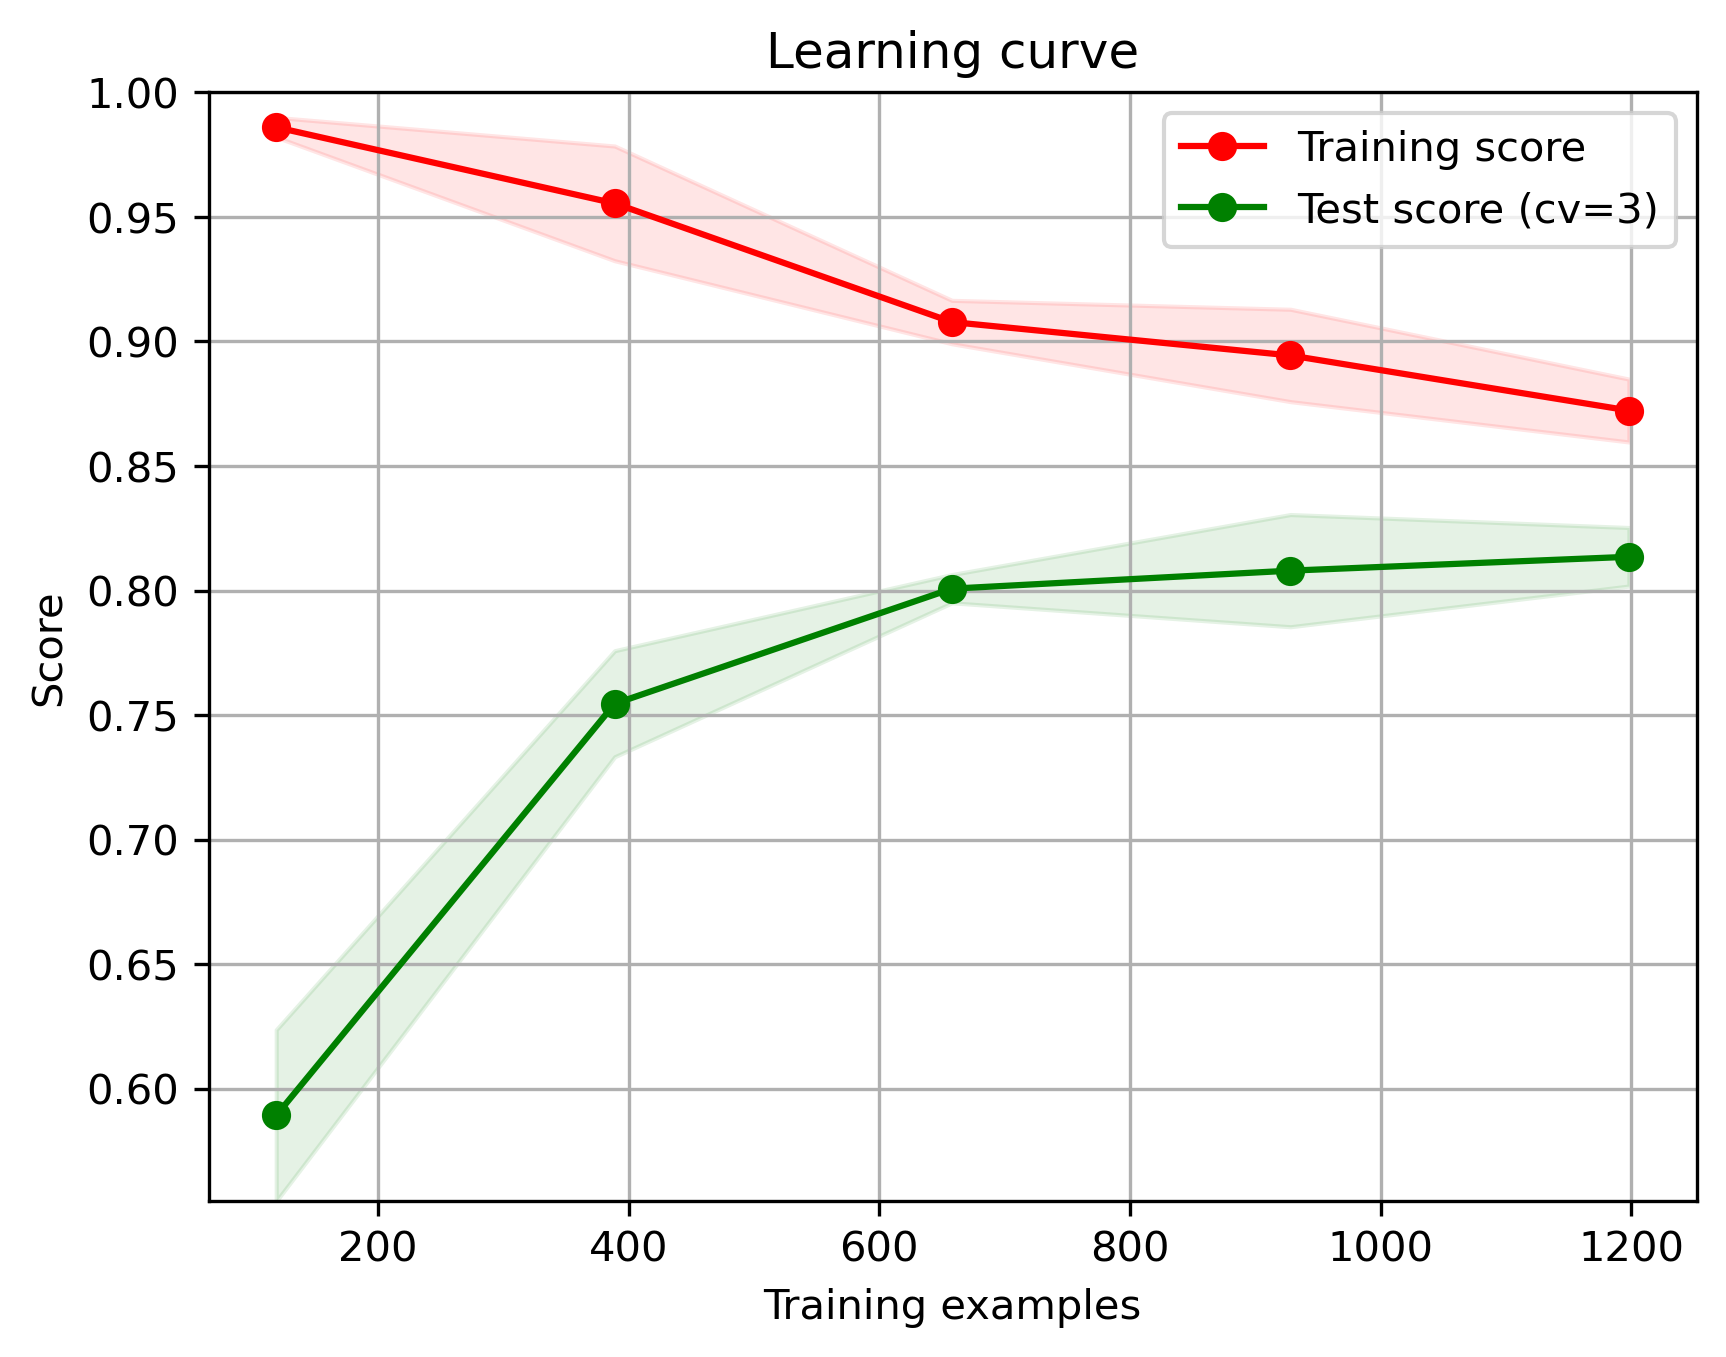

In [ ]:
# Example usage
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

model = GaussianNB()
plot_learning_curve(model, X, y)

training scores: [0.99439776 0.9982862  0.99898683 0.99928161 0.99888703]


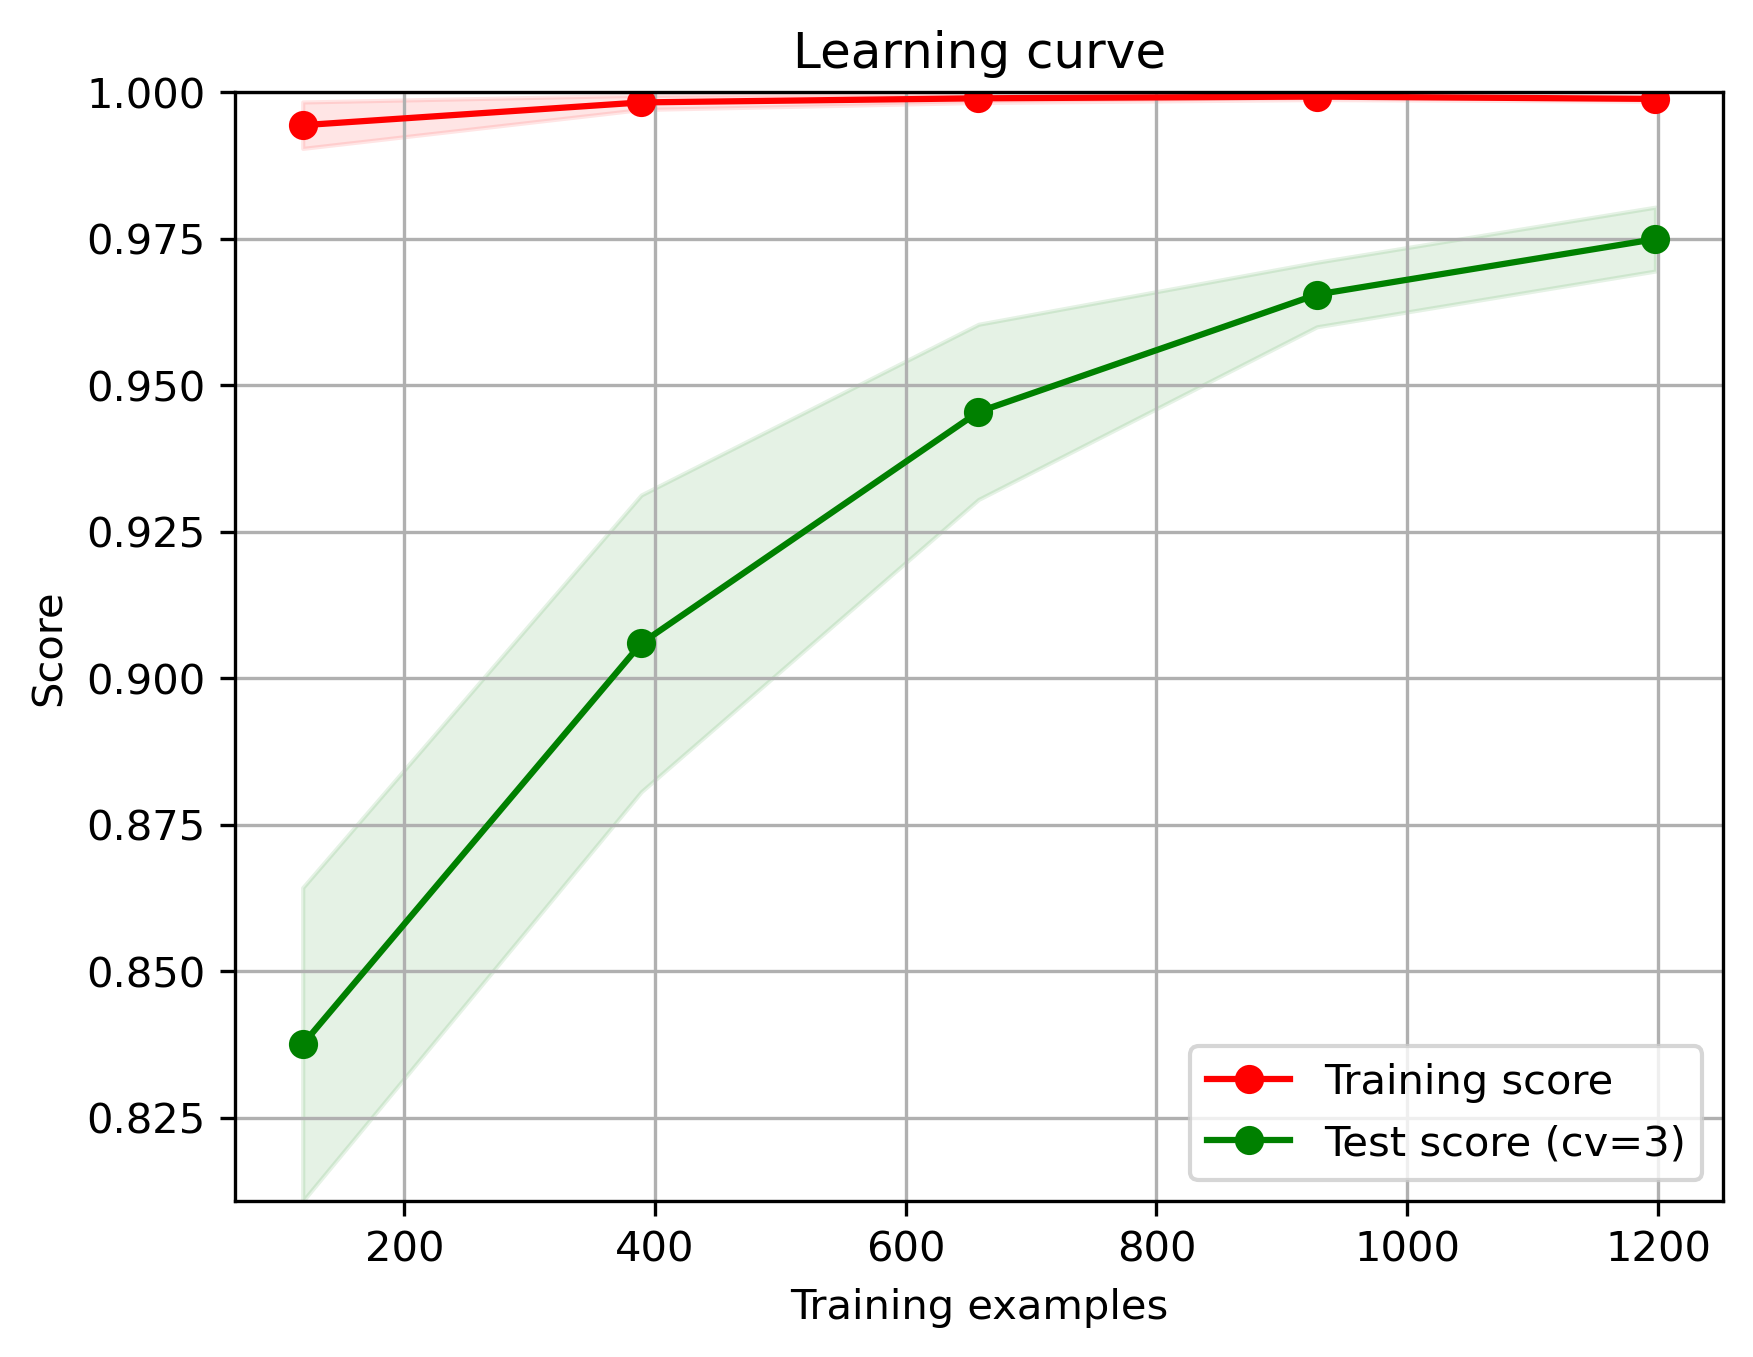

In [ ]:
# Let's see how it look for another model
from sklearn.svm import SVC

model = SVC(gamma=0.001)
plot_learning_curve(model, X, y)

In [ ]:
# --->> Your Turn <<<---
# Which difference do you observe between the two examples?
# How do you explain it?

In [ ]:
# Answer:
# -------
# Observation:
# In the first example, the training set performance decreases with increasing training set size
# while in the second example it increases.
# 
# For a simple model, the performance is limited by the model's capacity,
# thus more data will lead to a wors fit.
# Instead, for a complex model, more data will help to give a better fit.

In [ ]:
def plot_model_scaling(model, X, y):
    cv = 3 # number of cross-validation runs
    train_sizes = np.linspace(0.1, 1.0, 5)

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        model,
        X,
        y,
        cv=cv,
        n_jobs=-1,
        train_sizes=train_sizes,
        return_times=True,
    )
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot fit_times vs n_samples
    plt.plot(train_sizes, fit_times_mean, "o-")
    plt.fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    
    plt.grid()
    plt.title("Model Scaling")  
    y_min = np.min(fit_times_mean - fit_times_std)
    y_max = np.max(fit_times_mean + fit_times_std)
    plt.ylim((y_min,y_max))
    plt.xlabel("Training examples")
    plt.ylabel("Training time")

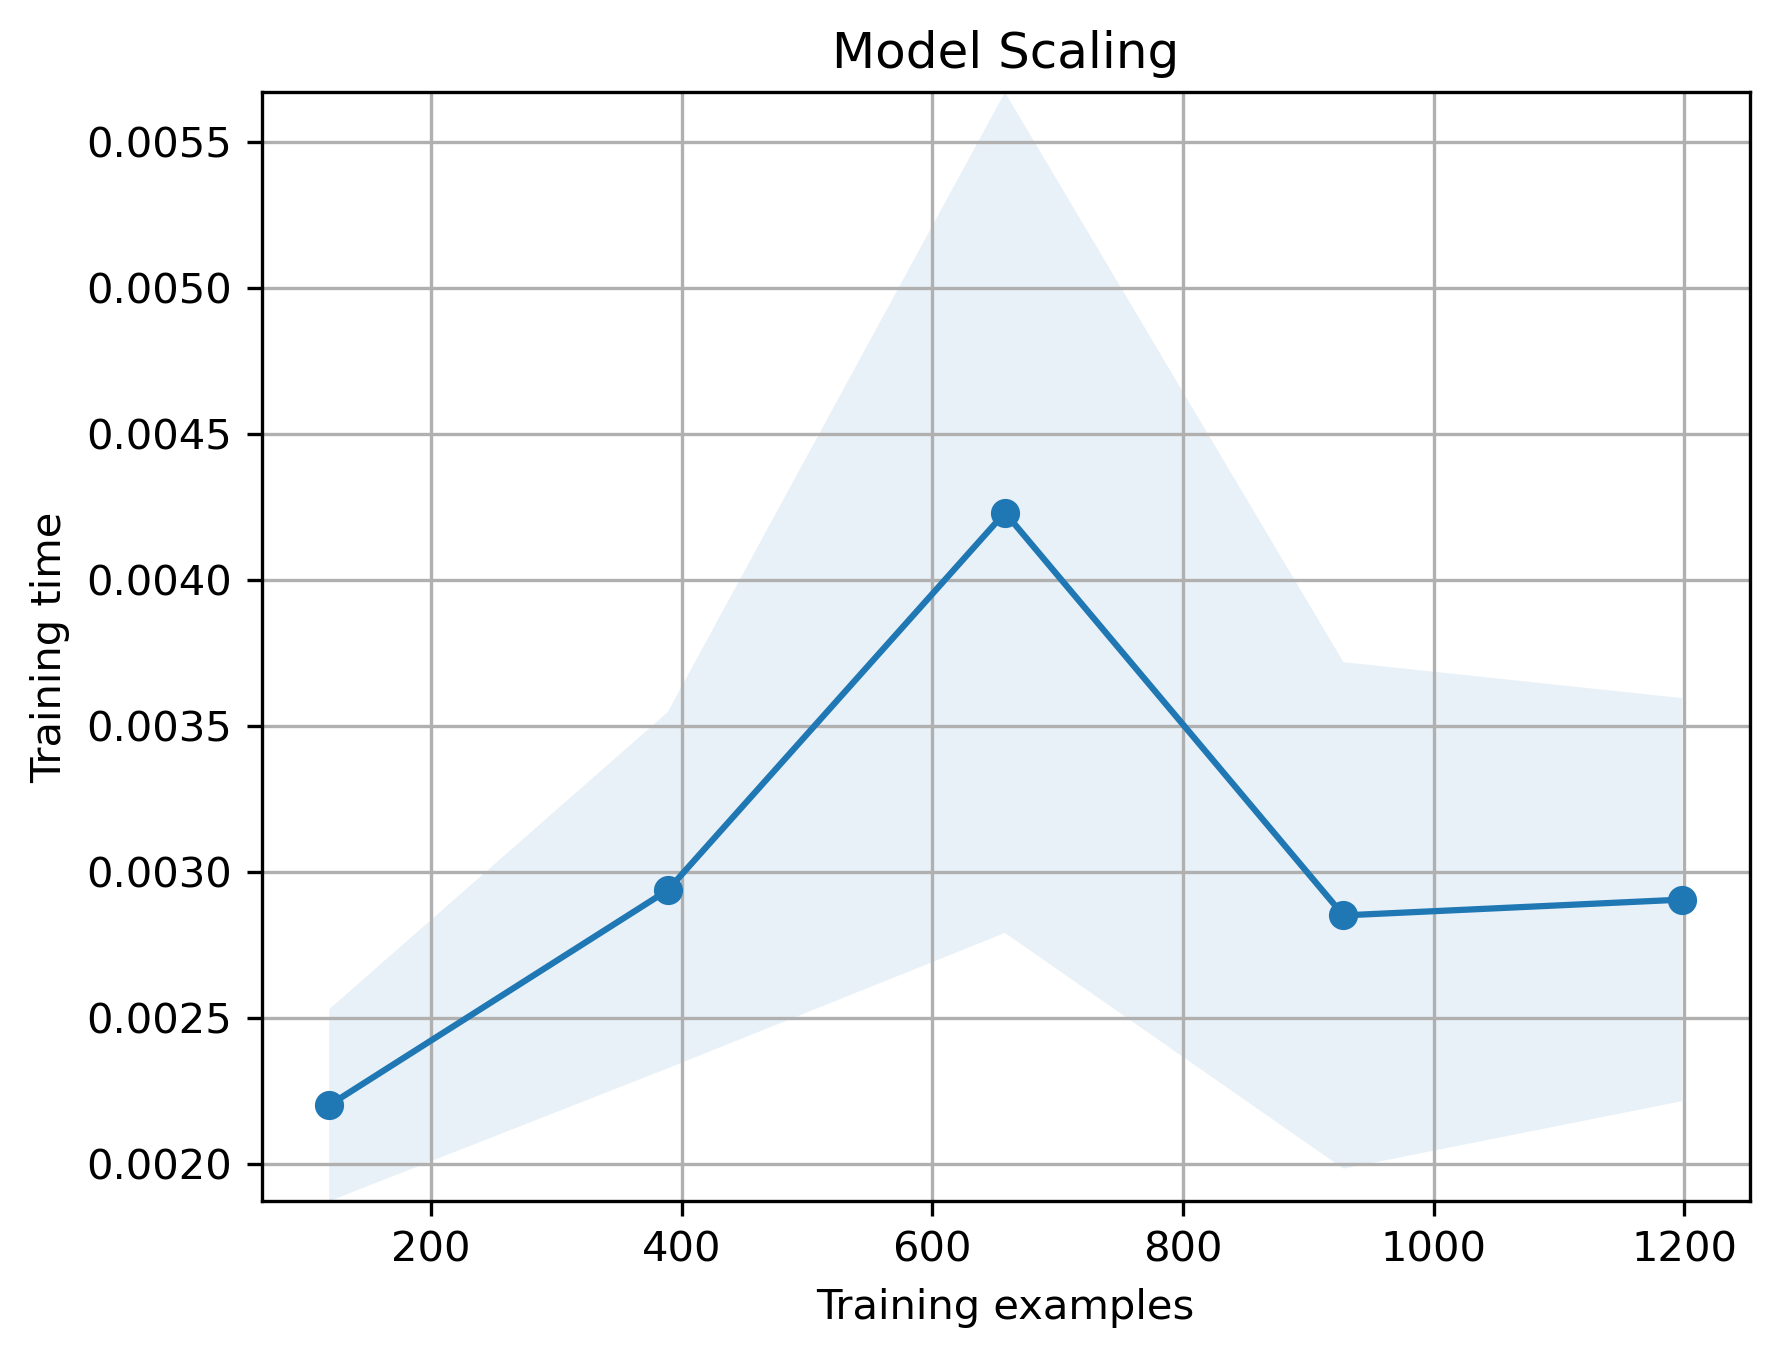

In [ ]:
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

X, y = load_digits(return_X_y=True)

model1 = GaussianNB()
model2 = SVC(gamma=0.001)

plot_model_scaling(model1, X, y)

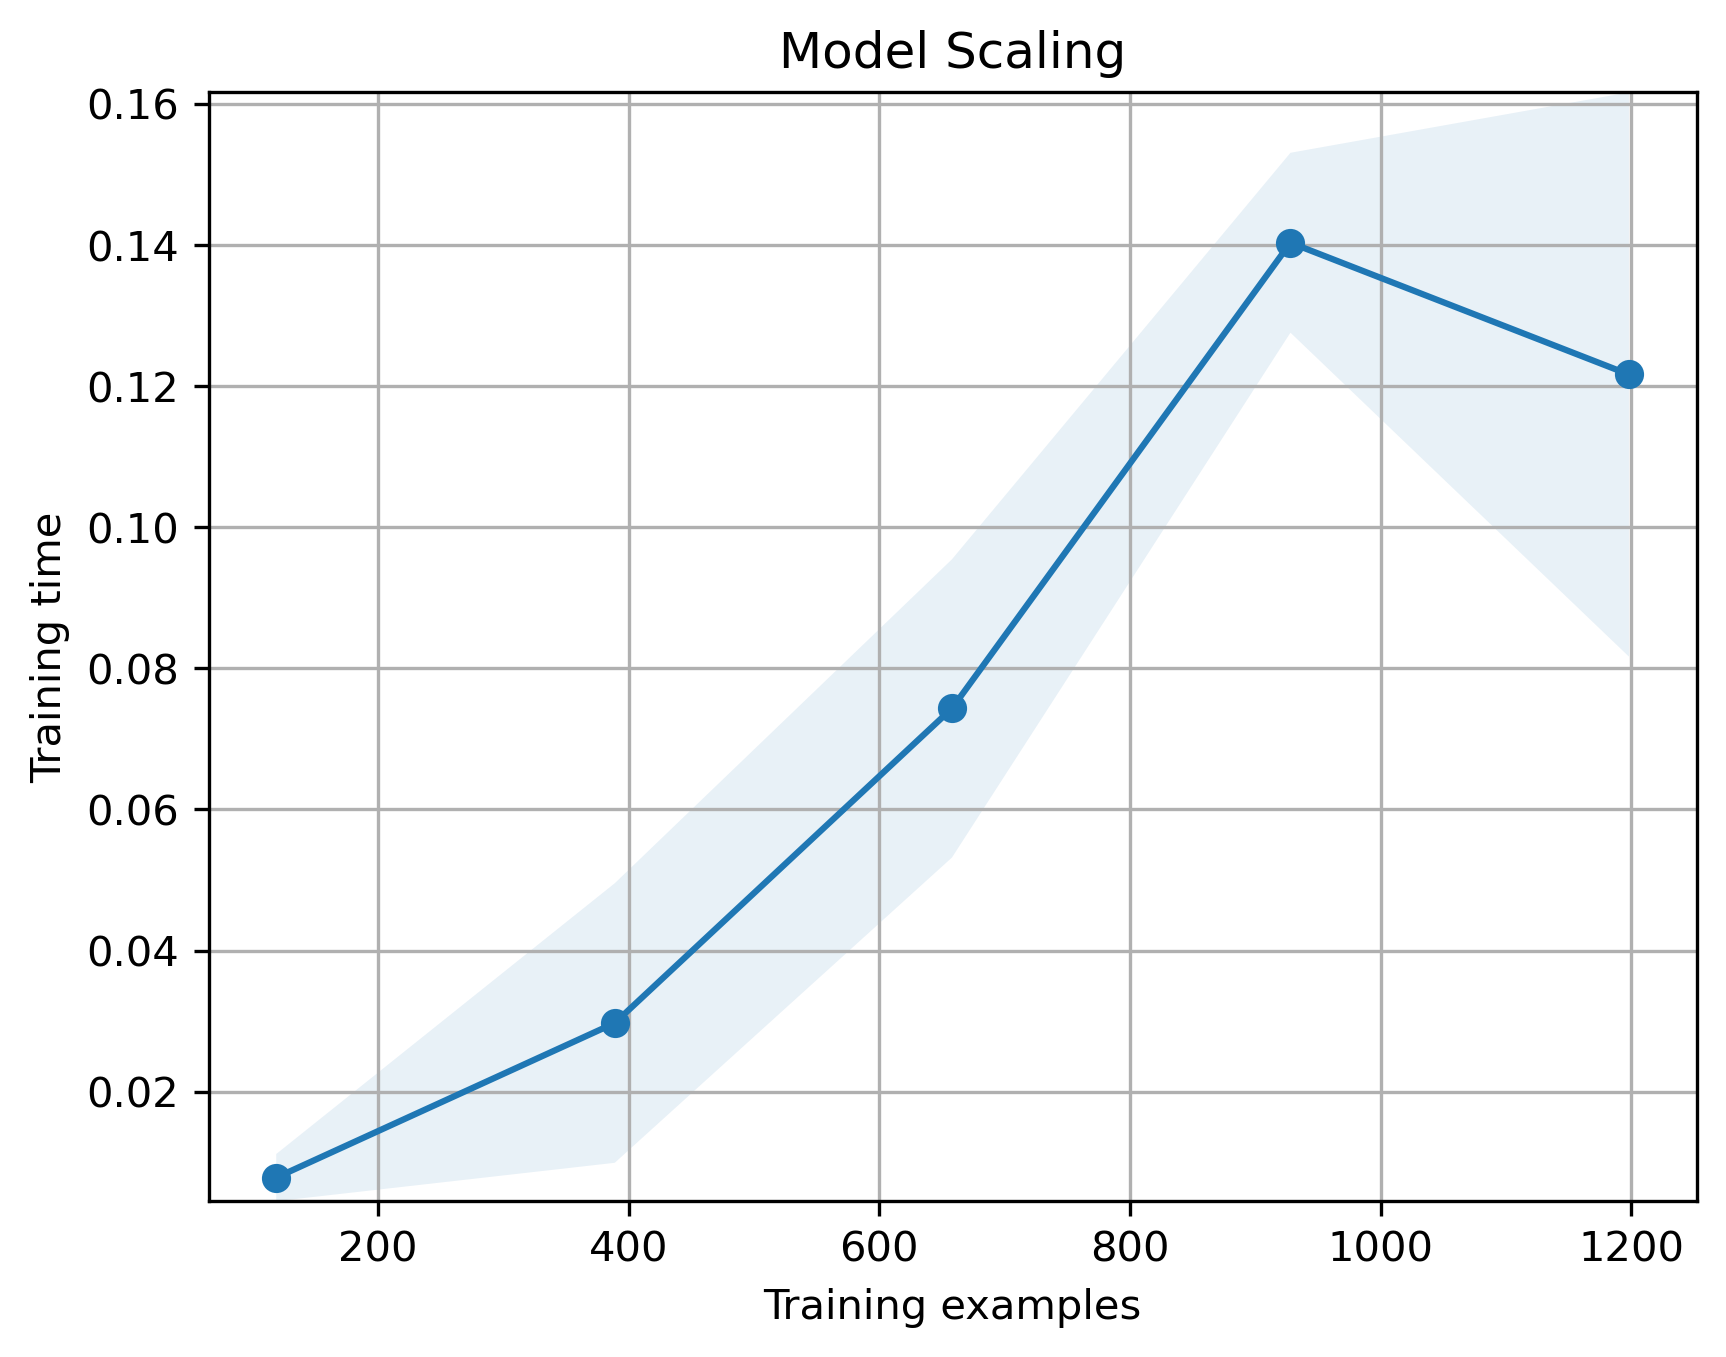

In [ ]:
plot_model_scaling(model2, X, y)

In [ ]:
# --->>> Your Turn <<<---
# What do you observe?

In [ ]:
# Answer:
# The first model is much faster and scales a bit better
# compared to the second.